In [1]:
from google.colab import files
uploaded = files.upload()

Saving Вопросы карьеры.csv to Вопросы карьеры.csv
Saving Вредные привычки, зависимость.csv to Вредные привычки, зависимость.csv
Saving Горе, потери.csv to Горе, потери.csv
Saving Депрессия.csv to Депрессия.csv
Saving Нервные расстройства.csv to Нервные расстройства.csv
Saving О достижении цели.csv to О достижении цели.csv
Saving Отношения с окружающими.csv to Отношения с окружающими.csv
Saving Поиск решения.csv to Поиск решения.csv
Saving Проблемы с детьми.csv to Проблемы с детьми.csv
Saving Проблемы с партнером.csv to Проблемы с партнером.csv
Saving Размышления о мире.csv to Размышления о мире.csv
Saving Самопознание, саморазвитие.csv to Самопознание, саморазвитие.csv
Saving Семейные проблемы.csv to Семейные проблемы.csv


In [2]:
!ls

 sample_data			     'Отношения с окружающими.csv'
'Вопросы карьеры.csv'		     'Поиск решения.csv'
'Вредные привычки, зависимость.csv'  'Проблемы с детьми.csv'
'Горе, потери.csv'		     'Проблемы с партнером.csv'
 Депрессия.csv			     'Размышления о мире.csv'
'Нервные расстройства.csv'	     'Самопознание, саморазвитие.csv'
'О достижении цели.csv'		     'Семейные проблемы.csv'


Let's create 2 files: training and test data

test data - 20%

In [3]:
from sklearn.model_selection import train_test_split
import os
import glob

In [4]:
extension = 'csv'
file_names = [i for i in glob.glob('*.{}'.format(extension))]
file_names_size = len(file_names);

Let's mark the data: add a column in which the value will mean the category number

In [5]:
import pandas as pd
import numpy as np

In [6]:
data_train = []
data_test = []

i = 0
while i<file_names_size:
  df = pd.read_csv(file_names[i], header=0)
  df['THEME'] = i
  train, test = train_test_split(df, test_size=0.2)
  data_train.append(train)
  data_test.append(test)
  i = i + 1

In [7]:
data_test[7][:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
239,239,u610352,Denisvan,"Невроз сна, астения",Здравствуйте. Мне 29 лет. Около 5-6 месяцев ст...,2020-03-26 16:09,2,https://www.b17.ru/forum/topic.php?id=308153,7
658,658,u472636,Тери0,Навязчивые мысли,"Здравствуйте! Помогите, пожалуйста. Мучают нав...",2019-11-04 13:12,6,https://www.b17.ru/forum/topic.php?id=187621,7
328,328,u352484,Настя0917,Переезд и одиночество,Здравствуйте! Мне 26 лет. Пол года назад я пер...,2020-02-28 20:59,2,https://www.b17.ru/forum/topic.php?id=304679,7


In [8]:
data_train[2][:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
467,467,u434784,kirkorovs_girl,Нездоровое общение,Лет 7 назад на курсах английского я познакомил...,2019-05-23 14:46,5,https://www.b17.ru/forum/topic.php?id=165169,2
435,435,u440913,Фифина,Последнее время всё трачу до последней копейки,Уже как два года я неограниченно трачу деньги ...,2019-06-24 14:33,2,https://www.b17.ru/forum/topic.php?id=169230,2
546,546,u264614,Людмила Никитина,Взрослый ребенок,"Добрый день, Наталья! У меня как раз взрослый ...",2019-04-03 10:36,1,https://www.b17.ru/forum/topic.php?id=158569,2


combining the data into a single file

-train

In [9]:
final_data_train = pd.concat(data_train)
final_data_train.to_csv( 'train.csv', index=False, encoding='utf-8-sig')

In [10]:
!wc -l train.csv

10548 train.csv


-test

In [11]:
final_data_test = pd.concat(data_test)
final_data_test.to_csv( "test.csv", index=False, encoding='utf-8-sig')

In [12]:
!wc -l test.csv

2639 test.csv


In [64]:
train = pd.read_csv('train.csv', header=0)
train[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,302,u405463,downtown,"Ярость, ярость, ярость - как ее немного разряд...","Евгения, добрый день!Хочу к Вам на консультаци...",2019-05-05 21:37,3,https://www.b17.ru/forum/topic.php?id=162804,0
1,350,u34632,наталия,Мой папа умер от рака,"Четыре месяца назад, у папы выявили рак толсто...",2019-01-06 05:44,16,https://www.b17.ru/forum/topic.php?id=146119,0
2,32,u292562,Helga_Rain,Как вернуть веру?,Не могу поверить в себя и свое творчество. Всё...,2019-07-22 07:16,34,https://www.b17.ru/forum/topic.php?id=172922,0


In [65]:
test = pd.read_csv('test.csv', header=0)
test[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,171,u478442,Komati,Умер муж,"Мне сегодня сказали, что мой муж умер. Неожида...",2019-11-25 00:44,14,https://www.b17.ru/forum/topic.php?id=190724,0
1,324,u408594,Personality),постоянные мысли о погибшей подруге(,Здравствуйте. Пару лет назад погибла моя бывша...,2019-06-13 00:48,9,https://www.b17.ru/forum/topic.php?id=167822,0
2,536,u146198,Мафусаил,Мне 30 и это капец,"Здравствуйте, друзья. Этот день настал. Вообще...",2018-09-24 18:23,49,https://www.b17.ru/forum/topic.php?id=132534,0


In [15]:
from tensorflow.keras import utils

In [66]:
trb_nan_idx = train[pd.isnull(train['MESSAGE'])].index.tolist()
train.loc[trb_nan_idx, 'MESSAGE'] = ' '
train.loc[trb_nan_idx, 'MESSAGE'] = ' '

In [67]:
x_train = train['MESSAGE']
y_train = utils.to_categorical(train['THEME'],file_names_size)

In [68]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    print(type(stems))
    return stems

In [71]:
upd_x_train = []
i = 0

for i in x_train:
  upd_train = token_and_stem(i)
  upd_x_train.append(upd_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<c

In [72]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
#можно расширить список стоп-слов
stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
tokens = []
train = []

for x_tr in upd_x_train:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  train.append(tokens)
  tokens = []

In [74]:
x_train[:3]

0    Евгения, добрый день!Хочу к Вам на консультаци...
1    Четыре месяца назад, у папы выявили рак толсто...
2    Не могу поверить в себя и свое творчество. Всё...
Name: MESSAGE, dtype: object

In [75]:
x_train

0        Евгения, добрый день!Хочу к Вам на консультаци...
1        Четыре месяца назад, у папы выявили рак толсто...
2        Не могу поверить в себя и свое творчество. Всё...
3        У меня все признаки любовной зависимости.Я зам...
4        не могу отойти от расставания,прошел месяц дев...
                               ...                        
10527    Добрый вечер!Такой вопрос- всякая ли травмирую...
10528    Сколько не ищу ответы на вопрос решения своих ...
10529    Я считаю, что на сайт б17 заходят люди с интел...
10530    Добрый вечер!Я девушка, 27 лет, живу одна. Раб...
10531    Как научиться ценить свою свободу и не строить...
Name: MESSAGE, Length: 10532, dtype: object

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [77]:
num_words = 5000
tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
upd_tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')

In [78]:
tokenizer.fit_on_texts(x_train)
upd_tokenizer.fit_on_texts(train)

In [79]:
tokenizer.word_index

{'и': 1,
 'не': 2,
 'я': 3,
 'в': 4,
 'что': 5,
 'с': 6,
 'на': 7,
 'как': 8,
 'но': 9,
 'то': 10,
 'меня': 11,
 'мне': 12,
 'это': 13,
 'у': 14,
 'а': 15,
 'он': 16,
 'все': 17,
 'так': 18,
 'к': 19,
 'по': 20,
 'за': 21,
 'очень': 22,
 'от': 23,
 'себя': 24,
 'она': 25,
 'его': 26,
 'или': 27,
 'было': 28,
 'из': 29,
 'когда': 30,
 'бы': 31,
 'уже': 32,
 'если': 33,
 'есть': 34,
 'нет': 35,
 'могу': 36,
 'мы': 37,
 'просто': 38,
 'хочу': 39,
 'лет': 40,
 'о': 41,
 'сейчас': 42,
 'для': 43,
 'же': 44,
 'только': 45,
 'даже': 46,
 'время': 47,
 'до': 48,
 'чтобы': 49,
 'со': 50,
 'может': 51,
 'вот': 52,
 'этого': 53,
 'день': 54,
 'знаю': 55,
 'ли': 56,
 'еще': 57,
 'потом': 58,
 'после': 59,
 'была': 60,
 'всё': 61,
 'себе': 62,
 'ничего': 63,
 'быть': 64,
 'жизни': 65,
 'раз': 66,
 'ее': 67,
 'ему': 68,
 'больше': 69,
 'этом': 70,
 'года': 71,
 'делать': 72,
 'они': 73,
 'понимаю': 74,
 'чем': 75,
 'вообще': 76,
 'много': 77,
 'тоже': 78,
 'него': 79,
 'ни': 80,
 'был': 81,
 'потому

In [80]:
upd_tokenizer.word_index

{'эт': 1,
 'мен': 2,
 'мо': 3,
 'себ': 4,
 'сво': 5,
 'очен': 6,
 'котор': 7,
 'ег': 8,
 'е': 9,
 'ил': 10,
 'друг': 11,
 'работ': 12,
 'когд': 13,
 'пот': 14,
 'мог': 15,
 'жизн': 16,
 'есл': 17,
 'ест': 18,
 'прост': 19,
 'дела': 20,
 'год': 21,
 'лет': 22,
 'говор': 23,
 'отношен': 24,
 'хоч': 25,
 'ещ': 26,
 'тольк': 27,
 'даж': 28,
 'больш': 29,
 'врем': 30,
 'нача': 31,
 'человек': 32,
 'понима': 33,
 'сказа': 34,
 'стал': 35,
 'чувств': 36,
 'хот': 37,
 'мног': 38,
 'зна': 39,
 'одн': 40,
 'муж': 41,
 'ден': 42,
 'работа': 43,
 'нич': 44,
 'хочет': 45,
 'быт': 46,
 'ем': 47,
 'нужн': 48,
 'посл': 49,
 'проблем': 50,
 'хорош': 51,
 'дом': 52,
 'дума': 53,
 'мам': 54,
 'люд': 55,
 'вообщ': 56,
 'хотел': 57,
 'постоя': 58,
 'тож': 59,
 'нег': 60,
 'месяц': 61,
 'всегд': 62,
 'дел': 63,
 'что-т': 64,
 'люб': 65,
 'тог': 66,
 'вопрос': 67,
 'ситуац': 68,
 'сильн': 69,
 'бол': 70,
 'сдела': 71,
 'мысл': 72,
 'добр': 73,
 'част': 74,
 'поня': 75,
 'психолог': 76,
 'можн': 77,
 'жит': 7

In [81]:
sequences = tokenizer.texts_to_sequences(x_train)
upd_sequences = upd_tokenizer.texts_to_sequences(train)

In [82]:
print(x_train[0])
print(sequences[0])
print(train[0])
print(upd_sequences[0])

Евгения, добрый день!Хочу к Вам на консультацию.Попробую покороче)Меня зовут Ира. У меня очень агрессивные родители - были и есть. Орали на меня до моих 18 лет, пока я не уехала в общежитие универа и не стала зарабатывать, чтобы у них не было возможности открыть рот на меня.Мой персональный ад длился 11 лет - с 7 до 18 лет. До 7 лет жизнь была более менее - я была дома с мамой, папа работал. А в 7 лет мы переехали в новый дом, в 7 лет я пошла в школу и мама стала орать на меня из-за любой не-5. В любой ситуации виновата всегда была Я. В любой ситуации с учителями, врачами, детьми, соседями и даже незнакомыми людьми на меня орали. Также в мои 7 лет родилась сестра и я в одно мгновение стала плохой. Меня всегда сравнивали с сестрой в ее пользу - начиная от особенностей фигуры и заканчивая характером. Мол, она добрая, я - злая, она любит животных (???!!!!!), я - не люблю (ААААА!!!!!), мол, она заботливая, а я - эгоистка. Орали, заставляли любить сестру.Мама говорила, что детей не хотела. 

In [83]:
max_text_len = 100
x_train = pad_sequences(sequences, maxlen=max_text_len)
upd_x_train = pad_sequences(upd_sequences, maxlen=max_text_len)

In [84]:
x_train[0]

array([  21,  153,  155,  294,   22,   77, 1960, 3689, 4068,    1,   49,
       4479,    8,   10,    3,  382,   60,  313, 3630,  639,   92,   79,
          3,   31,    2,  647,   24, 3215,   12,  255,   10,    5,  126,
       1566,    5,  144,    3,  238,    1,  114,  238,    1,    6,    9,
       2824,   14,   11, 1500,    1,    3,    6,    1,    3,   39, 3261,
        550,   24,  274, 2066, 3059, 1228,   41, 2928,  337, 2681,  854,
        467, 2929,  932, 1107,  327,    4,  247,   20, 3571,    1,    4,
         47,  761,  257,    6, 3307,    1, 1961,    1,   22, 1012, 1709,
         42, 1017,  118,  156,   22, 3262,  375,   21,  113,  242, 1310,
        381], dtype=int32)

In [85]:
upd_x_train[0]

array([1687, 2181,  408, 2642,  191,   18, 1158,  659, 2672,  238, 4718,
        218, 2054,  443,    1,  269, 2151,  833,  793,   14,   89,    1,
        198,    6,   38,  833,  422, 1253, 2390, 2264,  185,  189, 2299,
          5,  404, 4613,  689,   60,  589,    4,  133,  386, 4870,   37,
       3252,   32,   37, 2672,  484,    2,   43,  825, 4389, 1078,   25,
       1079,  199,  556,    4,  244, 3725,  584,  404,  666, 2474, 1125,
        302,  604,  603, 1578,   70,  666,  113,   70,  297,   61, 4278,
        194,   30,  867,  239, 2427, 4871,  797, 1192, 3025,    6,   29,
       2215, 1181, 3253, 1022,    7,    6, 2553,   12,  221,   65,   67,
       1586], dtype=int32)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU

In [87]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_text_len))

model_cnn.add(Conv1D(3*file_names_size**2, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(file_names_size**2, activation='relu'))
model_cnn.add(Dense(file_names_size, activation='softmax'))

In [88]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [89]:
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 96, 507)           81627     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 507)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 507)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 169)               85852     
_________________________________________________________________
dense_6 (Dense)              (None, 13)                2210      
Total params: 329,689
Trainable params: 329,689
Non-trainable params: 0
________________________________________________

In [90]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [91]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [92]:
upd_model_cnn_save_path = 'upd_best_model_cnn.h5'
upd_checkpoint_callback_cnn = ModelCheckpoint(upd_model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [93]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=20,
                            batch_size=256,
                            validation_split=0.2,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/20
33/33 [==============================] - 13s 365ms/step - loss: 2.4391 - accuracy: 0.1017 - val_loss: 5.4085 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_cnn.h5
Epoch 2/20
33/33 [==============================] - 12s 355ms/step - loss: 2.3413 - accuracy: 0.1374 - val_loss: 6.8609 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/20
33/33 [==============================] - 12s 354ms/step - loss: 2.2581 - accuracy: 0.1913 - val_loss: 7.1678 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/20
33/33 [==============================] - 12s 352ms/step - loss: 2.0987 - accuracy: 0.2616 - val_loss: 8.0782 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/20
33/33 [==============================] - 12s 354ms/step - loss: 1.8909 - accuracy: 0.3612 - val_loss: 9.2272 - val_accuracy: 0.0000e+00

Epoc

In [94]:
upd_history_cnn = model_cnn.fit(upd_x_train, 
                            y_train, 
                            epochs=20,
                            batch_size=256,
                            validation_split=0.2,
                            callbacks=[upd_checkpoint_callback_cnn])

Epoch 1/20
33/33 [==============================] - 12s 359ms/step - loss: 4.1268 - accuracy: 0.1750 - val_loss: 8.6546 - val_accuracy: 0.0062

Epoch 00001: val_accuracy improved from -inf to 0.00617, saving model to upd_best_model_cnn.h5
Epoch 2/20
33/33 [==============================] - 12s 359ms/step - loss: 1.7225 - accuracy: 0.4094 - val_loss: 9.1337 - val_accuracy: 0.0095

Epoch 00002: val_accuracy improved from 0.00617 to 0.00949, saving model to upd_best_model_cnn.h5
Epoch 3/20
33/33 [==============================] - 12s 354ms/step - loss: 1.4722 - accuracy: 0.5043 - val_loss: 10.4841 - val_accuracy: 0.0275

Epoch 00003: val_accuracy improved from 0.00949 to 0.02753, saving model to upd_best_model_cnn.h5
Epoch 4/20
33/33 [==============================] - 12s 352ms/step - loss: 1.2846 - accuracy: 0.5765 - val_loss: 11.3626 - val_accuracy: 0.0351

Epoch 00004: val_accuracy improved from 0.02753 to 0.03512, saving model to upd_best_model_cnn.h5
Epoch 5/20
33/33 [===============

In [95]:
import matplotlib.pyplot as plt

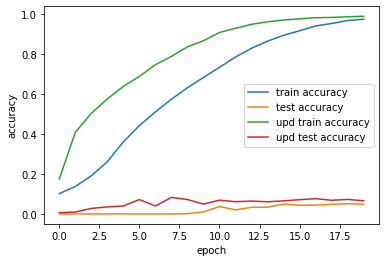

In [96]:
plt.plot(history_cnn.history['accuracy'], 
         label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_cnn.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_cnn.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [97]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_text_len))
model_lstm.add(LSTM(169))
model_lstm.add(Dense(13, activation='softmax'))

In [98]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [99]:
model_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 169)               136552    
_________________________________________________________________
dense_7 (Dense)              (None, 13)                2210      
Total params: 298,762
Trainable params: 298,762
Non-trainable params: 0
_________________________________________________________________


In [100]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [101]:
upd_model_lstm_save_path = 'upd_best_model_lstm.h5'
upd_checkpoint_callback_lstm = ModelCheckpoint(upd_model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [102]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=20,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/20
33/33 [==============================] - 23s 651ms/step - loss: 2.4366 - accuracy: 0.1012 - val_loss: 5.9537 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_lstm.h5
Epoch 2/20
33/33 [==============================] - 21s 637ms/step - loss: 2.3809 - accuracy: 0.1119 - val_loss: 6.3331 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/20
33/33 [==============================] - 21s 650ms/step - loss: 2.3568 - accuracy: 0.1358 - val_loss: 5.8223 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/20
33/33 [==============================] - 21s 643ms/step - loss: 2.2090 - accuracy: 0.2075 - val_loss: 5.5509 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/20
33/33 [==============================] - 21s 642ms/step - loss: 2.0914 - accuracy: 0.2666 - val_loss: 5.8011 - val_accuracy: 0.0000e+00

Epo

In [103]:
upd_history_lstm = model_lstm.fit(upd_x_train, 
                              y_train, 
                              epochs=20,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[upd_checkpoint_callback_lstm])

Epoch 1/20
33/33 [==============================] - 20s 619ms/step - loss: 2.9440 - accuracy: 0.1119 - val_loss: 3.3596 - val_accuracy: 0.0071

Epoch 00001: val_accuracy improved from -inf to 0.00712, saving model to upd_best_model_lstm.h5
Epoch 2/20
33/33 [==============================] - 21s 635ms/step - loss: 2.4216 - accuracy: 0.1607 - val_loss: 4.2602 - val_accuracy: 0.0024

Epoch 00002: val_accuracy did not improve from 0.00712
Epoch 3/20
33/33 [==============================] - 21s 637ms/step - loss: 2.2770 - accuracy: 0.2049 - val_loss: 5.1404 - val_accuracy: 9.4922e-04

Epoch 00003: val_accuracy did not improve from 0.00712
Epoch 4/20
33/33 [==============================] - 21s 623ms/step - loss: 2.1527 - accuracy: 0.2544 - val_loss: 5.7958 - val_accuracy: 0.0019

Epoch 00004: val_accuracy did not improve from 0.00712
Epoch 5/20
33/33 [==============================] - 21s 629ms/step - loss: 1.9674 - accuracy: 0.3269 - val_loss: 6.0147 - val_accuracy: 0.0043

Epoch 00005: va

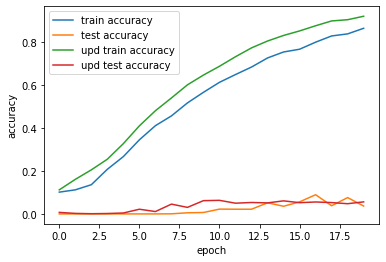

In [104]:
plt.plot(history_lstm.history['accuracy'], 
         label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_lstm.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_lstm.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [105]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_text_len))
model_gru.add(GRU(169))
model_gru.add(Dense(13, activation='softmax'))

In [106]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [107]:
model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
gru (GRU)                    (None, 169)               102921    
_________________________________________________________________
dense_8 (Dense)              (None, 13)                2210      
Total params: 265,131
Trainable params: 265,131
Non-trainable params: 0
_________________________________________________________________


In [108]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [109]:
upd_model_gru_save_path = 'upd_best_model_gru.h5'
upd_checkpoint_callback_gru = ModelCheckpoint(upd_model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [110]:
upd_history_gru = model_gru.fit(upd_x_train, 
                              y_train, 
                              epochs=20,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[upd_checkpoint_callback_gru])

Epoch 1/20
33/33 [==============================] - 20s 559ms/step - loss: 2.4596 - accuracy: 0.0944 - val_loss: 5.2097 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to upd_best_model_gru.h5
Epoch 2/20
33/33 [==============================] - 17s 527ms/step - loss: 2.3713 - accuracy: 0.1186 - val_loss: 6.0020 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/20
33/33 [==============================] - 18s 533ms/step - loss: 2.3287 - accuracy: 0.2033 - val_loss: 6.2138 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/20
33/33 [==============================] - 17s 527ms/step - loss: 2.1983 - accuracy: 0.2715 - val_loss: 5.3249 - val_accuracy: 4.7461e-04

Epoch 00004: val_accuracy improved from 0.00000 to 0.00047, saving model to upd_best_model_gru.h5
Epoch 5/20
33/33 [==============================] - 18s 537ms/step - loss: 1.9472 - accuracy: 0.3494 - va

In [111]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=20,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/20
33/33 [==============================] - 17s 508ms/step - loss: 3.4197 - accuracy: 0.0931 - val_loss: 3.2072 - val_accuracy: 0.0256

Epoch 00001: val_accuracy improved from -inf to 0.02563, saving model to best_model_gru.h5
Epoch 2/20
33/33 [==============================] - 17s 514ms/step - loss: 2.4647 - accuracy: 0.1541 - val_loss: 3.8468 - val_accuracy: 0.0047

Epoch 00002: val_accuracy did not improve from 0.02563
Epoch 3/20
33/33 [==============================] - 17s 520ms/step - loss: 2.2703 - accuracy: 0.2036 - val_loss: 4.4465 - val_accuracy: 0.0038

Epoch 00003: val_accuracy did not improve from 0.02563
Epoch 4/20
33/33 [==============================] - 17s 511ms/step - loss: 2.1476 - accuracy: 0.2510 - val_loss: 5.0346 - val_accuracy: 0.0024

Epoch 00004: val_accuracy did not improve from 0.02563
Epoch 5/20
33/33 [==============================] - 16s 497ms/step - loss: 2.0413 - accuracy: 0.2971 - val_loss: 5.5374 - val_accuracy: 0.0028

Epoch 00005: val_accurac

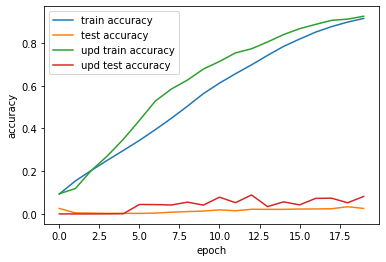

In [112]:
plt.plot(history_gru.history['accuracy'], 
         label='train accuracy')
plt.plot(history_gru.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_gru.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [120]:
test = pd.read_csv('test.csv', header=0)
test[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,171,u478442,Komati,Умер муж,"Мне сегодня сказали, что мой муж умер. Неожида...",2019-11-25 00:44,14,https://www.b17.ru/forum/topic.php?id=190724,0
1,324,u408594,Personality),постоянные мысли о погибшей подруге(,Здравствуйте. Пару лет назад погибла моя бывша...,2019-06-13 00:48,9,https://www.b17.ru/forum/topic.php?id=167822,0
2,536,u146198,Мафусаил,Мне 30 и это капец,"Здравствуйте, друзья. Этот день настал. Вообще...",2018-09-24 18:23,49,https://www.b17.ru/forum/topic.php?id=132534,0


In [121]:
x_test = test['MESSAGE']

In [122]:
upd_x_test = []
i = 0

for i in x_test:
  upd_test = token_and_stem(i)
  upd_x_test.append(upd_test)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [123]:
tokens = []
test = []

for x_tr in upd_x_test:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  test.append(tokens)
  tokens = []

In [124]:
test_sequences = tokenizer.texts_to_sequences(x_test)
upd_test_sequences = upd_tokenizer.texts_to_sequences(test)

In [125]:
x_test = pad_sequences(test_sequences, maxlen=max_text_len)
upd_x_test = pad_sequences(upd_test_sequences, maxlen=max_text_len)

In [127]:
test = pd.read_csv('test.csv', header=0)

In [128]:
y_test = utils.to_categorical(test['THEME'],file_names_size)

In [129]:
model_cnn.load_weights(model_cnn_save_path)
model_cnn.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 1s 10ms/step - loss: 6.6710 - accuracy: 0.2847


[6.670954704284668, 0.2846853733062744]

In [130]:
model_cnn.load_weights(upd_model_cnn_save_path)
model_cnn.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 1s 10ms/step - loss: 4.6226 - accuracy: 0.3351


[4.622573375701904, 0.3351023495197296]

In [133]:
model_lstm.load_weights(model_lstm_save_path)
model_lstm.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 4s 52ms/step - loss: 3.3515 - accuracy: 0.3025


[3.35150408744812, 0.3025018870830536]

In [134]:
model_lstm.load_weights(upd_model_lstm_save_path)
model_lstm.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 4s 52ms/step - loss: 2.9584 - accuracy: 0.3256


[2.9584221839904785, 0.325625479221344]

In [135]:
model_gru.load_weights(model_gru_save_path)
model_gru.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 2s 29ms/step - loss: 4.7931 - accuracy: 0.2441


[4.793086051940918, 0.24412433803081512]

In [136]:
model_gru.load_weights(upd_model_gru_save_path)
model_gru.evaluate(upd_x_test, y_test, verbose=1)

83/83 [==============================] - 2s 29ms/step - loss: 3.3531 - accuracy: 0.2904


[3.353079080581665, 0.29037150740623474]